<a href="https://colab.research.google.com/github/Deem-KSU/IT326-Group1-56546/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6. Evaluation and Comparison:

##Classification:

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

url = "https://raw.githubusercontent.com/Deem-KSU/IT326-Group1-56546/main/DataSet/Preprocessed_dataset.csv"
preprocessed_data= pd.read_csv(url)
preprocessed_data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,0.714286,1.0,0.792757,0.4,0,0,1,0.250000,0.00,0,1
1,0,0.285714,0.4,0.175050,1.0,0,1,0,0.250000,0.25,1,0
2,1,0.619048,0.6,0.402414,1.0,2,0,0,0.750000,0.00,1,0
3,0,0.476190,0.6,0.112676,0.4,1,1,1,0.333333,1.00,1,1
4,0,0.333333,0.8,0.623742,0.6,0,1,1,0.083333,0.00,0,0


###Feature Selection:

In [ ]:
#spliting data into features and target
col= preprocessed_data.keys().tolist() [:-1]
features= preprocessed_data[col]
target= preprocessed_data['Depression']
print ("Features columns: \n\n",features)
print ("class column: \n \n",target)

Features columns: 

        Gender       Age  Academic Pressure      CGPA  Study Satisfaction  \
0           1  0.714286                1.0  0.792757                 0.4   
1           0  0.285714                0.4  0.175050                 1.0   
2           1  0.619048                0.6  0.402414                 1.0   
3           0  0.476190                0.6  0.112676                 0.4   
4           0  0.333333                0.8  0.623742                 0.6   
...       ...       ...                ...       ...                 ...   
27834       0  0.428571                1.0  0.144869                 1.0   
27835       1  0.428571                0.4  0.879276                 0.6   
27836       1  0.619048                0.6  0.317907                 0.8   
27837       0  0.000000                1.0  0.372233                 0.4   
27838       1  0.428571                0.8  0.847082                 0.2   

       Sleep Duration  Dietary Habits  Have you ever had suicidal 

###Spliting data into training and test:
1- 90 % training set and 10% testing set:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1)

##2. Clustering:

We selected K = 2, 3, and 4 because these values allowed us to explore different levels of granularity in the clustering structure.
K = 2 identifies broad separation between low-risk and high-risk students, K = 3 provides a moderate segmentation, and K = 4 reveals more detailed behavioral patterns.

###Elbow Method

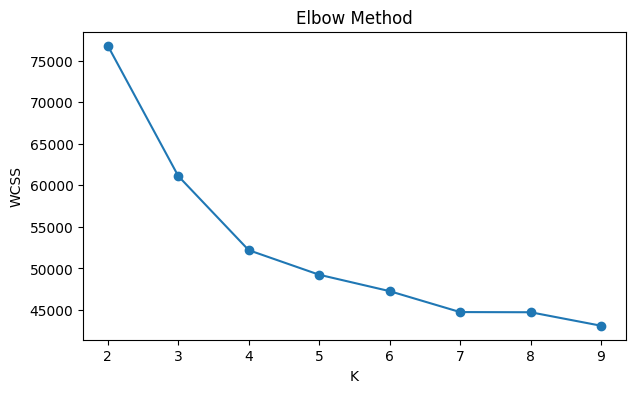

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_values = range(2, 10)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_values, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


We used the Elbow Method to identify the point where the WCSS starts decreasing more slowly.
Based on the curve, the slope begins to flatten around K = 3, indicating diminishing returns after this point.

###Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(preprocessed_data)
    score = silhouette_score(preprocessed_data, labels)
    print(f"Silhouette Score for K={k}: {score}")


Silhouette Score for K=2: 0.315400429549377
Silhouette Score for K=3: 0.27386531894137556
Silhouette Score for K=4: 0.2569640365998984


Higher Silhouette Coefficient values indicate better-defined clusters.
The highest score was achieved at K = 2, meaning this K produced the best separation between clusters.

###Apply K-means for K=2,3,4

In [ ]:
results = {}

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(preprocessed_data)
    results[k] = labels
    preprocessed_data[f"K{k}_Cluster"] = labels


###Visualize clusters

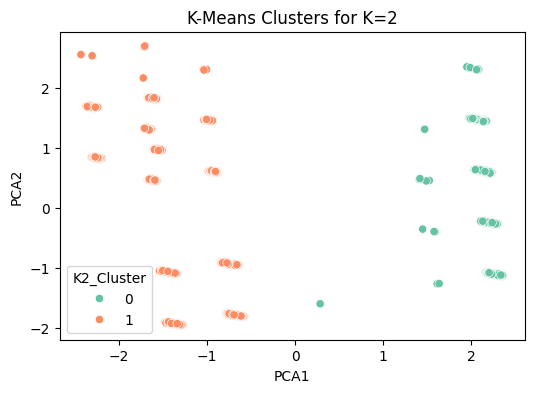

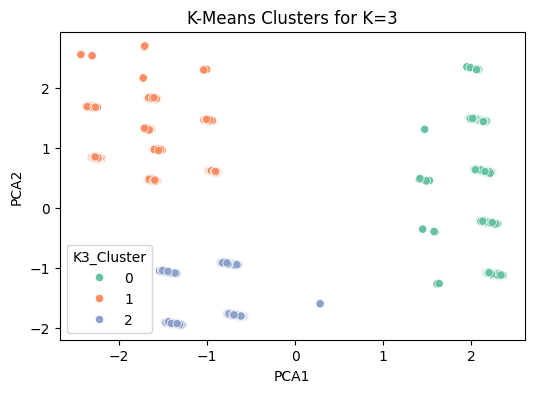

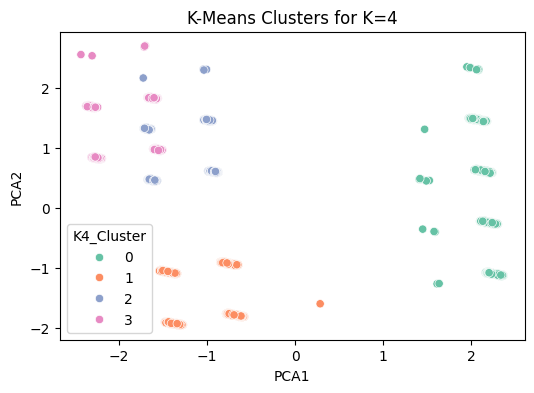

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(preprocessed_data)

preprocessed_data['PCA1'] = pca_data[:,0]
preprocessed_data['PCA2'] = pca_data[:,1]

for k in [2, 3, 4]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=preprocessed_data,
        x="PCA1",
        y="PCA2",
        hue=f"K{k}_Cluster",
        palette="Set2"
    )
    plt.title(f"K-Means Clusters for K={k}")
    plt.show()


After visualizing the clusters using PCA, K = 3 showed the most interpretable and clearly separated cluster structure, with balanced distributions across groups.

The Elbow Method indicated a noticeable change in slope around K = 3, suggesting an appropriate cluster boundary.

Silhouette Coefficients showed that K = 2 produced the best-separated clusters, meaning that students within the same cluster share more similar psychological and behavioral characteristics.

By visualizing the clusters after PCA transformation, we observed clear and well-defined separation patterns at K = 3. This confirms that K = 3 provides the most meaningful and interpretable clustering structure for this dataset.